### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

In [2]:
df = pd.read_csv('data/telco_churn_data.csv')

In [3]:
pd.options.display.max_columns=None
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,No,Yes,No,No,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [4]:
df_copy=df.copy()
df_copy.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,No,Yes,No,No,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [5]:
#df_copy['Referred a Friend']=df_copy['Referred a Friend'].replace(('No','Yes'),(0,1))
#df['Referred a Friend']= df.replace({'Referred a Friend': {'yes': 1, 'no': 0}})
#df['Referred a Friend'] = df['Referred a Friend'].map({'yes': 1, 'no': 0})

#df_copy['Referred a Friend']=df_copy['Referred a Friend'].replace(('No',0))

#df['Referred a Friend'] = df['Referred a Friend'].map({'yes':True, 'no':False})

#df['Referred a Friend']= df.replace({'Referred a Friend':{'Yes':1,'No':0}})
#df_copy
#df['Referred a Friend'].shape

In [7]:
#df_copy['Referred a Friend']=df_copy['Referred a Friend'].replace(('No','Yes'),(0,1))
df_copy.columns


Index(['Customer ID', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Population',
       'Churn Value', 'CLTV', 'Churn Category', 'Churn Reason',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction'],
      dtype='object')

In [8]:
df_columns=['Referred a Friend','Phone Service','Multiple Lines','Internet Service','Online Security', 
            'Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV', 'Streaming Movies',
            'Streaming Music', 'Unlimited Data','Paperless Billing','Under 30','Senior Citizen', 'Married', 'Dependents']

In [9]:
for columns in df_columns:
    df_copy[columns]=df_copy[columns].replace(('No','Yes'),(0,1))

In [10]:
df_copy.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,0,0,1,None,0,0.00,0,1,Fiber Optic,9,0,0,1,0,0,1,0,0,Month-to-Month,1,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,0,1,0,0,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,1,1,8,Offer E,1,48.85,1,1,Cable,19,0,1,0,0,0,0,0,0,Month-to-Month,1,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,0,1,1,1,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,0,0,18,Offer D,1,11.33,1,1,Fiber Optic,57,0,0,0,0,1,1,1,1,Month-to-Month,1,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,0,1,0,1,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,1,1,25,Offer C,1,19.76,0,1,Fiber Optic,13,0,1,1,0,1,1,0,0,Month-to-Month,1,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,0,1,1,1,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,1,1,37,Offer C,1,6.33,1,1,Cable,15,0,0,0,0,0,0,0,0,Month-to-Month,1,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,0,1,1,1,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


I changed all columns that have yes/no by 1/0

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   int64  
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   int64  
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   int64  
 8   Internet Service                   7043 non-null   int64  
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   int64

In [12]:
df_copy.isnull().sum()/df_copy.shape[0]*100

Customer ID                           0.000000
Referred a Friend                     0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Offer                                 0.000000
Phone Service                         0.000000
Avg Monthly Long Distance Charges     0.000000
Multiple Lines                        0.000000
Internet Service                      0.000000
Internet Type                         0.000000
Avg Monthly GB Download               0.000000
Online Security                       0.000000
Online Backup                         0.000000
Device Protection Plan                0.000000
Premium Tech Support                  0.000000
Streaming TV                          0.000000
Streaming Movies                      0.000000
Streaming Music                       0.000000
Unlimited Data                        0.000000
Contract                              0.000000
Paperless Billing                     0.000000
Payment Metho

I made a null values checking.My isnull() function get "Churn Category" 73.463013 percent, Churn Reason 73.463013 percent, Customer Satisfaction 73.959960 percent missing value.I decided to get rid off them.

In [13]:
object_list=[]
for j in df_copy.columns:
    if df_copy[j].dtypes=='object':
        object_list.append(j)
print(object_list) 

['Customer ID', 'Offer', 'Internet Type', 'Contract', 'Payment Method', 'Gender', 'City', 'Churn Category', 'Churn Reason']


In [14]:
drop_list=[]
for i in df_copy.columns:
    if df_copy[i].isnull().sum()/df_copy.shape[0]*100>0:
        drop_list.append(i)
print(drop_list)       

['Churn Category', 'Churn Reason', 'Customer Satisfaction']


In [15]:
X=df_copy.drop(['Customer ID','Internet Type','Contract','City','Churn Category',
                'Churn Reason','Customer Satisfaction'], axis=1)

In [16]:
X.head(5)

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,0,0,1,None,0,0.00,0,1,9,0,0,1,0,0,1,0,0,1,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,0,1,0,0,0,90022,34.023810,-118.156582,68701,1,5433,5,0
1,1,1,8,Offer E,1,48.85,1,1,19,0,1,0,0,0,0,0,0,1,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,0,1,1,1,1,90063,34.044271,-118.185237,55668,1,5302,5,0
2,0,0,18,Offer D,1,11.33,1,1,57,0,0,0,0,1,1,1,1,1,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,0,1,0,1,3,90065,34.108833,-118.229715,47534,1,3179,1,0
3,1,1,25,Offer C,1,19.76,0,1,13,0,1,1,0,1,1,0,0,1,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,0,1,1,1,1,90303,33.936291,-118.332639,27778,1,5337,1,1
4,1,1,37,Offer C,1,6.33,1,1,15,0,0,0,0,0,0,0,0,1,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,0,1,1,1,1,90602,33.972119,-118.020188,26265,1,2793,1,0


Then I aplied the drop() function method to drop 'Customer ID','Contract'
'City', and columns such as 'Churn Category','Churn Reason',and 'Customer Satisfaction' that have a large amount of missing datas

In [17]:
Gender=pd.get_dummies(X['Gender'])
Gender.head()

,Female,Male
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [18]:
df_copy['Offer']=df_copy['Offer'].str.replace('None','No Offer')

In [19]:
df_copy['Offer'].value_counts()

No Offer    3877
Offer B      824
Offer E      805
Offer D      602
Offer A      520
Offer C      415
Name: Offer, dtype: int64

In [20]:
Gender=pd.get_dummies(X['Gender'],drop_first=True)
Offer=pd.get_dummies(X['Offer'],drop_first=True)
Payment_Method=pd.get_dummies(X['Payment Method'],drop_first=True)

In [21]:
#concat to the X dataset
X=pd.concat([X,Gender,Offer,Payment_Method],axis=1)
X.head(5)

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Male,Offer A,Offer B,Offer C,Offer D,Offer E,Credit Card,Mailed Check
0,0,0,1,None,0,0.00,0,1,9,0,0,1,0,0,1,0,0,1,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,0,1,0,0,0,90022,34.023810,-118.156582,68701,1,5433,5,0,1,0,0,0,0,0,0,0
1,1,1,8,Offer E,1,48.85,1,1,19,0,1,0,0,0,0,0,0,1,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,0,1,1,1,1,90063,34.044271,-118.185237,55668,1,5302,5,0,0,0,0,0,0,1,1,0
2,0,0,18,Offer D,1,11.33,1,1,57,0,0,0,0,1,1,1,1,1,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,0,1,0,1,3,90065,34.108833,-118.229715,47534,1,3179,1,0,1,0,0,0,1,0,0,0
3,1,1,25,Offer C,1,19.76,0,1,13,0,1,1,0,1,1,0,0,1,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,0,1,1,1,1,90303,33.936291,-118.332639,27778,1,5337,1,1,0,0,0,1,0,0,0,0
4,1,1,37,Offer C,1,6.33,1,1,15,0,0,0,0,0,0,0,0,1,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,0,1,1,1,1,90602,33.972119,-118.020188,26265,1,2793,1,0,0,0,0,1,0,0,0,0


In [22]:
X=X.drop(['Gender','Offer','Payment Method'],axis=1)
X.head(5)

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Male,Offer A,Offer B,Offer C,Offer D,Offer E,Credit Card,Mailed Check
0,0,0,1,0,0.00,0,1,9,0,0,1,0,0,1,0,0,1,41.236,39.65,0.00,0.0,0.00,78,0,1,0,0,0,90022,34.023810,-118.156582,68701,1,5433,5,0,1,0,0,0,0,0,0,0
1,1,1,8,1,48.85,1,1,19,0,1,0,0,0,0,0,0,1,83.876,633.30,0.00,120.0,390.80,74,0,1,1,1,1,90063,34.044271,-118.185237,55668,1,5302,5,0,0,0,0,0,0,1,1,0
2,0,0,18,1,11.33,1,1,57,0,0,0,0,1,1,1,1,1,99.268,1752.55,45.61,0.0,203.94,71,0,1,0,1,3,90065,34.108833,-118.229715,47534,1,3179,1,0,1,0,0,0,1,0,0,0
3,1,1,25,1,19.76,0,1,13,0,1,1,0,1,1,0,0,1,102.440,2514.50,13.43,327.0,494.00,78,0,1,1,1,1,90303,33.936291,-118.332639,27778,1,5337,1,1,0,0,0,1,0,0,0,0
4,1,1,37,1,6.33,1,1,15,0,0,0,0,0,0,0,0,1,79.560,2868.15,0.00,430.0,234.21,80,0,1,1,1,1,90602,33.972119,-118.020188,26265,1,2793,1,0,0,0,0,1,0,0,0,0


In [23]:
X.dtypes

Referred a Friend                      int64
Number of Referrals                    int64
Tenure in Months                       int64
Phone Service                          int64
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int64
Internet Service                       int64
Avg Monthly GB Download                int64
Online Security                        int64
Online Backup                          int64
Device Protection Plan                 int64
Premium Tech Support                   int64
Streaming TV                           int64
Streaming Movies                       int64
Streaming Music                        int64
Unlimited Data                         int64
Paperless Billing                      int64
Monthly Charge                       float64
Total Regular Charges                float64
Total Refunds                        float64
Total Extra Data Charges             float64
Total Long Distance Charges          float64
Age       

In [24]:
# Checking missing data
X.isnull().sum()

Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Paperless Billing                    0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Age                                  0
Under 30                             0
Senior Citizen                       0
Married                  

<AxesSubplot:xlabel='Avg Monthly GB Download', ylabel='Monthly Charge'>

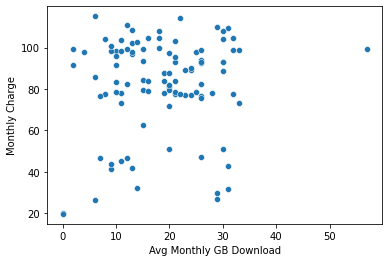

In [68]:
sns.scatterplot(data=X[:100],x='Avg Monthly GB Download',y='Monthly Charge')

In [69]:
def myscatter(data,assignment):
    sns.scatterplot(data=X[:100],x='Avg Monthly GB Download',y='Monthly Charge',
                   hue=assignment,
                   palette=sns.color_palette('Set1',as_cmap=True))
    

# Prepare the data

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [71]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scaling the data

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
#instanciate StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

# Apply PCA

In [74]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(scaled_data)
pca.explained_variance_ratio_

array([0.1494875 , 0.09056486, 0.06696472, 0.05958039, 0.04853559,
       0.04609254, 0.03337834, 0.02889265, 0.02793097, 0.02674951,
       0.02596374, 0.02514805, 0.02450556, 0.02368076, 0.02279058,
       0.02247665, 0.02220657, 0.01836066, 0.0181241 , 0.01793584,
       0.01740239, 0.01597379, 0.01592835, 0.01532991, 0.01486982,
       0.01415582, 0.0134552 , 0.01243518, 0.01208552, 0.01181336,
       0.01023777, 0.00876143, 0.00708193, 0.00575333, 0.00514132,
       0.00440867, 0.00328561, 0.00252216, 0.00242006, 0.00230361,
       0.00164858, 0.0015763 , 0.00108571, 0.0009546 ])

In [75]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [76]:
np.arange(pca.n_components_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43])

In [77]:
for i in np.arange(pca.n_components_):
    print(pca.explained_variance_ratio_[i].sum())

0.1494875027826583
0.09056486242165587
0.06696472303490499
0.05958039428651387
0.04853558855584163
0.04609253807047819
0.033378335963603
0.02889264594013584
0.02793097283066441
0.026749506052765385
0.0259637361464325
0.02514805270433664
0.024505564975389985
0.02368076087332396
0.02279058431098774
0.02247664662405504
0.022206565222642756
0.018360656850473105
0.018124096919098425
0.017935837604894988
0.01740238659360627
0.01597379201944303
0.015928348964273902
0.015329905177495348
0.014869820955015496
0.014155818907058458
0.013455202621314858
0.012435181278572778
0.012085520248299623
0.011813358201515542
0.010237772061898983
0.008761427181279055
0.007081925618358764
0.005753330178430763
0.0051413244458628805
0.0044086674697954
0.003285605449184727
0.002522163419257729
0.002420064400930817
0.0023036103224331815
0.0016485828930726532
0.0015763041721979312
0.0010857119910788013
0.0009546032587663578


# Scree Plot

Text(0.5, 1.0, 'scree plot')

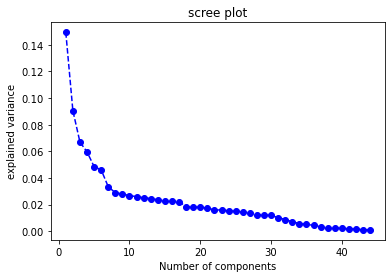

In [78]:
pc_values=np.arange(pca.n_components_)+1
plt.plot(pc_values,pca.explained_variance_ratio_,'--o', color='blue')
plt.xlabel('Number of components')
plt.ylabel('explained variance')
plt.title('scree plot')

In [79]:
# from the scree plot select the number of pcs
pca=PCA(n_components=10)
pca_reduced_comp=pca.fit_transform(scaled_data)

# appling KMeans

In [80]:
inertias=[]
for cluster in range(1,16):
    #instanciate KMeans
    kmeans=KMeans(n_clusters=cluster,init='k-means++',random_state=42)
    #fit the data
    kmeans.fit(X)
    inertia=kmeans.inertia_
    inertias.append(inertia)
#X_transformed=kmeans.transform(scaled_data)

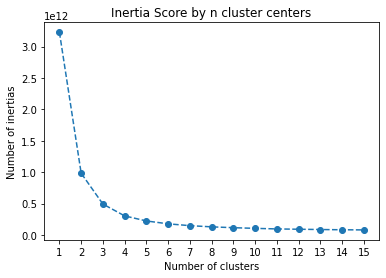

In [81]:
plt.plot(list(range(1, 16)), inertias, '--o')
plt.xticks(list(range(1, 16)), list(range(1, 16)))
plt.xlabel('Number of clusters')
plt.ylabel('Number of inertias')
plt.title('Inertia Score by n cluster centers');

In [82]:
#Final I choose 5 clusters 
#instanciate KMeans
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
#fit the data
kmeans.fit(X)
inertia=kmeans.inertia_
inertias.append(inertia)

In [83]:
kmeans.labels_

array([3, 0, 0, ..., 1, 1, 2])

# initiazing random

In [46]:
inertias_random=[]
for cluster in range(1,16):
    #instanciate KMeans
    kmeans=KMeans(n_clusters=cluster,init='random',random_state=42)
    #fit the data
    kmeans.fit(X)
    inertia=kmeans.inertia_
    inertias_random.append(inertia)
#X_transformed=kmeans.transform(scaled_data)

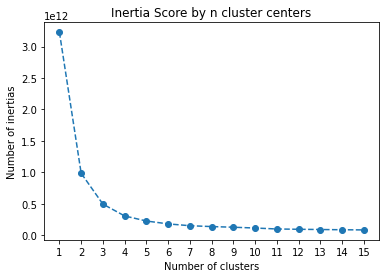

In [47]:
plt.plot(list(range(1, 16)), inertias_random, '--o')
plt.xticks(list(range(1, 16)), list(range(1, 16)))
plt.xlabel('Number of clusters')
plt.ylabel('Number of inertias')
plt.title('Inertia Score by n cluster centers');

In [58]:
#Final I choose 5 clusters 
#instanciate KMeans
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42, verbose=0,)
#fit the data
kmeans.fit(X)
inertia=kmeans.inertia_
inertias.append(inertia)

In [50]:
kmeans.labels_

array([3, 0, 0, ..., 1, 1, 2])

In [57]:
kmeans.verbose

1

# Using DBSCAN

In [59]:
dbscan=DBSCAN(eps=0.5,min_samples=5)
#fit the data
dbscan.fit(scaled_data)
label= dbscan.labels_

In [66]:
np.shape(label)

(7043,)

In [60]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)